# Logistic Regression
We create sigmoids curves to classify phenomenas

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

For this example we gonna use the Winsconsin Breast Cancer DataSet. This is a images cells dataset obtained from people with posible mama cancer

In [ ]:
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer_datos['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
cancer_datos['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer_df =pd.DataFrame(cancer_datos['data'], columns=cancer_datos['feature_names'])
cancer_df['objetivo']=cancer_datos['target']

In [ ]:
cancer_df.shape

(569, 31)

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df['objetivo'].value_counts(True)

# If we check 1 is for benign cancer and 0 is a malign


,proportion
objetivo,
1,0.627417
0,0.372583


In [ ]:
cancer_df['objetivo']=cancer_df['objetivo'].replace({1:0,0:1})


In [ ]:
cancer_df['objetivo'].value_counts(True)

,proportion
objetivo,
0,0.627417
1,0.372583


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

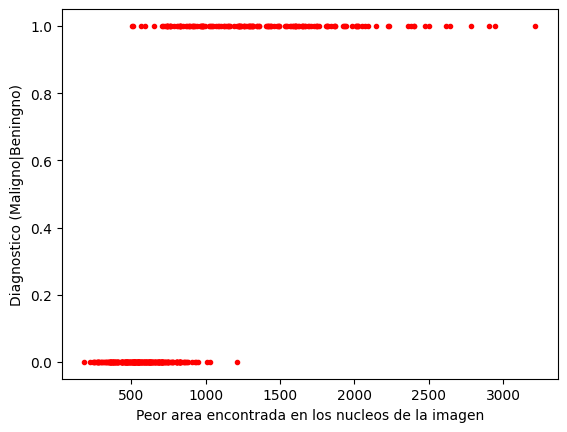

In [ ]:
train_df, test_df = train_test_split(cancer_df, test_size=0.2)

train_variables = cancer_datos['feature_names']
target_variable = 'target'

columna_entrenamiento = "worst area"

plt.plot(train_df[columna_entrenamiento], train_df['objetivo'], '.r')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [ ]:
modelo_ols = LinearRegression()
modelo_ols.fit(train_df[[columna_entrenamiento]], train_df['objetivo'])

LinearRegression()

In [ ]:
predictions = modelo_ols.predict(test_df[[columna_entrenamiento]])
predictions

array([ 1.19345458,  0.90532327,  0.1665847 ,  0.10806872,  0.20073613,
        0.16829569,  0.15789285,  0.11997723,  0.06563608,  0.12764248,
        0.02991053,  0.08356729,  0.35883193,  0.31646773,  0.31242979,
        0.12093539,  0.15173327,  0.03264812,  0.28245318,  0.34712873,
       -0.0152597 ,  0.29114503,  0.14810597,  0.39010889,  0.16412087,
        0.09677616,  0.1858847 ,  0.57339052,  0.89505731,  0.6055572 ,
        1.98256481,  0.4741529 ,  0.19635598,  0.98745096,  0.06803147,
        0.14550526,  0.07008466,  0.19635598,  0.24672763,  0.63772388,
       -0.00725225,  0.4464348 ,  0.40078549,  0.8971105 ,  0.32146383,
       -0.02408843,  0.23694075,  0.17370243,  0.22941238, -0.02532034,
        0.09376481,  0.14817441,  0.51863873,  0.05742331,  0.13188575,
        0.88000056, -0.03613382,  0.66030899,  0.30852872,  0.20662194,
        0.29408793,  0.47073091, -0.00451466,  0.91969561,  0.24748047,
        0.1058102 ,  0.73285512,  1.1079049 ,  0.61034798,  0.68

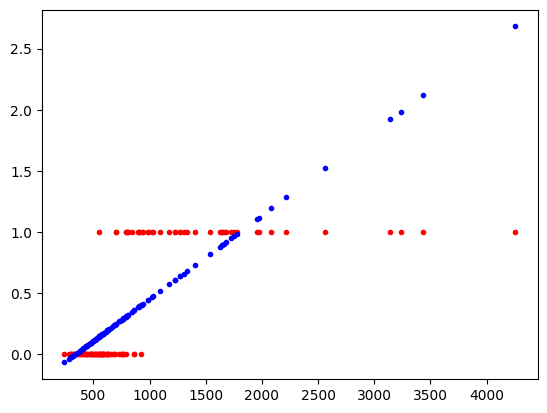

In [ ]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predictions, '.b')


In [ ]:
def funcion_logistica(x,L=1,k=1,x0=0):
    return L / (1+np.exp(-k*(x-x0)))

predicciones_probabilidades = list(map(funcion_logistica,predictions))

Text(0, 0.5, 'Diagnostico (Maligno|Beningno)')

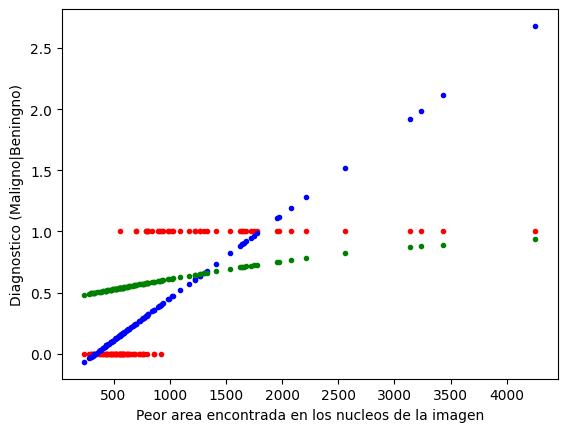

In [ ]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predictions, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

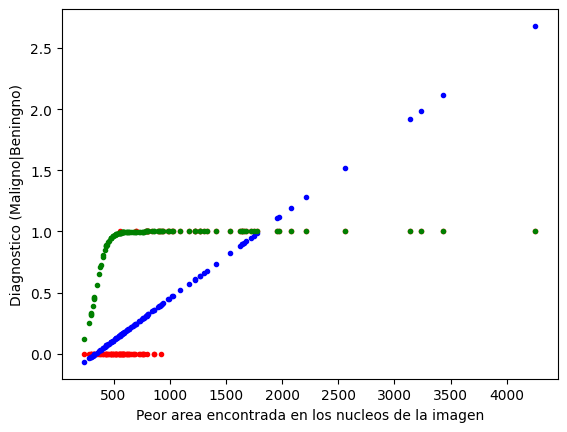

In [ ]:
from functools import partial

funcion_logit_k5 = partial(funcion_logistica, k=30)

predicciones_probabilidades = list(map(funcion_logit_k5, predictions))

plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predictions, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = cancer_df[train_variables]
y = cancer_df['objetivo']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
clf = LogisticRegression(solver='liblinear') # if you have more than 2 classify options we use solver = 'libgs'
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions[:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
predict_proba = clf.predict_proba(X_test)
predict_proba[0:10] # display the probabiliy to be in 0 or 1

array([[7.54267158e-06, 9.99992457e-01],
       [9.84678288e-01, 1.53217120e-02],
       [9.72537589e-01, 2.74624113e-02],
       [1.86437827e-02, 9.81356217e-01],
       [9.99743305e-01, 2.56694651e-04],
       [6.80566714e-12, 1.00000000e+00],
       [9.99612478e-01, 3.87521896e-04],
       [9.93232376e-01, 6.76762415e-03],
       [9.91327486e-01, 8.67251354e-03],
       [7.11233294e-10, 9.99999999e-01]])

(array([[37.,  2.,  3.,  2.,  1.,  1.,  1.,  2.,  6., 59.],
        [59.,  6.,  2.,  1.,  1.,  1.,  2.,  3.,  2., 37.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

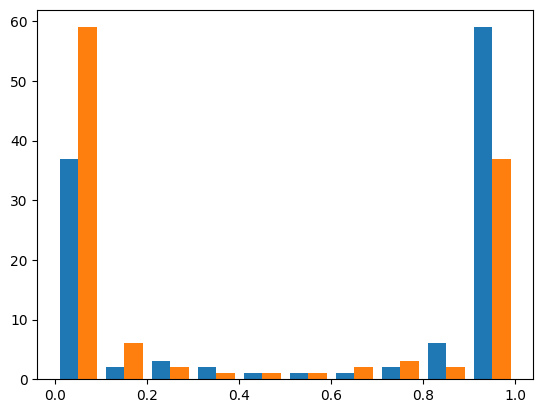

In [ ]:
plt.hist(predict_proba)

In [ ]:
probs_df = pd.DataFrame(predict_proba)
X = X_test.reset_index().copy()
X["objetivo"] = y_test.tolist()
X["prediccion"] = predictions
X = pd.concat([X, probs_df], axis=1)
X[["objetivo", "prediccion", 0, 1]].head(20)
X[X['objetivo']!=X['prediccion']][["objetivo", "prediccion", 0, 1]].shape[0]/X.shape[0]
print(X[X['objetivo']!=X['prediccion']][["objetivo", "prediccion", 0, 1]].shape[0]/X.shape[0]*100,'%')

7.017543859649122 %
